# Multi-neuron Simple Network with Activation Functions for Non-linear Modeling

In the last notebook, the simple linear model performed well on linear data, but it struggled on relatively complex data. It was because the model could only learned modeling straight lines. But as the new data followed a curve simply adding more linear neurons is not the solution. The model's output would still be a straight line.

For a model to learn the complex, curved patterns found in real-world data, it needs to use non-linear activation functions. In this notebook, the most popular and powerful activation function _ReLU_ (Rectified Linear Unit) will be used to build a more sophisticated model. By adding a ReLU activation, the model can create multiple _bends_ that can approximate more complex pattern.

In this tutorial

- A technique called _normalization_ will be used for the model to get trained more effectively.
- A _non-linear_ neural network will be built using the _ReLU_ activation function.
- The trained model will learn the complex, curved relationship in the data.
- The trained model will also perform predictions to see if it can finally model the non-linear relationships on the new data.

## Importing Packages

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

## Data Ingestion & Preparation

Loads the same dataset having non-linear relationship between independent (order distance) and dependent (delivery time) variable.

In [2]:
# The tensor contains distances from 1 to 20 miles, and another tensor contains the corresponding delivery times in minutes.

distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

**Visualizing the New Dataset's Non-linear Relationships between Variables**

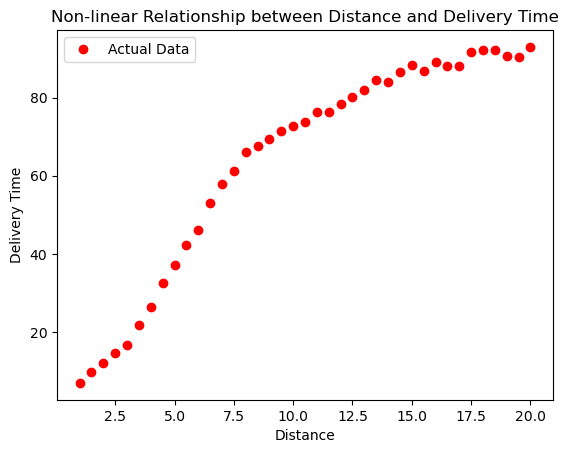

In [4]:
plt.plot(distances.numpy(), times.numpy(), 'ro', label='Actual Data')           # Actual data points in red
plt.xlabel('Distance')
plt.ylabel('Delivery Time')
plt.title('Non-linear Relationship between Distance and Delivery Time')
plt.legend()
plt.show()

### Data Preparation - Normalizing the Data

Before building your model, data gets throught a step called _normalization_ - a standard technique that makes the model training process more stable and effective by adjusting the scale of the data. This adjustment of get the data _standarized_ (also called _z-score normalization_) helps prevent large distance values from dominating the learning process and keeps gradients stable during training.

In [5]:
# Calculates the mean and standard deviation for the 'distances' tensor
distances_mean = distances.mean()
distances_std = distances.std()

# Calculate the mean and standard deviation for the 'times' tensor
times_mean = times.mean()
times_std = times.std()

# Apply standardization to the distances.
distances_normalized = (distances - distances_mean) / distances_std

# Apply standardization to the times.
times_normalized = (times - times_mean) / times_std

The underlined pattern remains the same even after the data gets normalized as can be observed over the plot and its axes in the below figure.

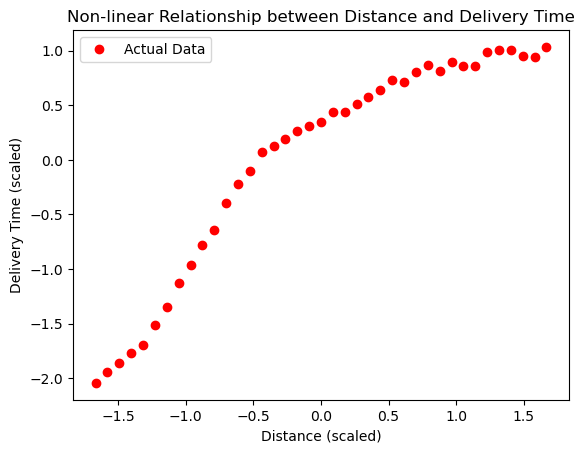

In [7]:
plt.plot(distances_normalized.numpy(), times_normalized.numpy(), 'ro', label='Actual Data')           # Actual data points in red
plt.xlabel('Distance (scaled)')
plt.ylabel('Delivery Time (scaled)')
plt.title('Non-linear Relationship between Distance and Delivery Time')
plt.legend()
plt.show()

## Modeling

The model architecture now uses _ReLU_ activation functions on the neurons to provide the model the ability to learn non-linear relationships.

In [8]:
torch.manual_seed(27)   # Ensures that the results are reproducible and consistent every time.

model = nn.Sequential(  # Defines the model consists of multiple layers connected sequentially
    nn.Linear(1, 3),    # The hidden layer with 1 input neuron and 3 output neurons
    nn.ReLU(),          # Each of the 3 neurons applies the ReLU activation function to introduce non-linearity
    nn.Linear(3, 1)     # Output layer with 1 neuron (without any activation function) to produce the final prediction
)

### Model Training

In [9]:
# Defines the loss function and optimizer
loss_function = nn.MSELoss()    # Measures the mean squared loss during training

# Stochastic Gradient Descent optimizer adjusts model's weight and bias parameters based on the errors
optimizer = optim.SGD(model.parameters(), lr=0.01)

**Visualizing the Predictions against Actual Target on New Dataset**

In [10]:
# Model now cycles through more iterations over the normalized data to discover gradually the relationship between distance and delivery time.

for epoch in range(3000):
    
    # Clears gradients from the previous round. Without this, PyTorch would accumulate adjustments, which could break the learning process.
    optimizer.zero_grad()   

    outputs = model(distances_normalized)              # Performs the "forward pass", where the model makes predictions based on the input distances.
    loss = loss_function(outputs, times_normalized)    # Calculates how wrong the predicted outputs are by comparing them to the actual delivery times.
    loss.backward()                         # The "backward pass" (backpropagation) is performed, which calculates exactly how to adjust the weight and bias to reduce the error.
    optimizer.step()                        # Updates the model's parameters using those calculated adjustments.

    # The loss is printed every 50 epochs to track the model's learning progress as the error decreases.
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 100: Loss = 0.4327000379562378
Epoch 200: Loss = 0.0801103487610817
Epoch 300: Loss = 0.01843724213540554
Epoch 400: Loss = 0.009037445299327374
Epoch 500: Loss = 0.007089325226843357
Epoch 600: Loss = 0.0062707592733204365
Epoch 700: Loss = 0.005673009902238846
Epoch 800: Loss = 0.005225020926445723
Epoch 900: Loss = 0.004886913578957319
Epoch 1000: Loss = 0.004626257810741663
Epoch 1100: Loss = 0.0044206539168953896
Epoch 1200: Loss = 0.004255363252013922
Epoch 1300: Loss = 0.0041206530295312405
Epoch 1400: Loss = 0.00400986522436142
Epoch 1500: Loss = 0.003918218892067671
Epoch 1600: Loss = 0.0038421223871409893
Epoch 1700: Loss = 0.0037483240012079477
Epoch 1800: Loss = 0.003648609621450305
Epoch 1900: Loss = 0.0035632289946079254
Epoch 2000: Loss = 0.0034900589380413294
Epoch 2100: Loss = 0.0034273534547537565
Epoch 2200: Loss = 0.003373617073521018
Epoch 2300: Loss = 0.0033275610767304897
Epoch 2400: Loss = 0.0032880688086152077
Epoch 2500: Loss = 0.003254181705415249
Epoch

With your model and training tools ready, you can begin the training process.

* You will run the training loop for `3000` epochs (more than Lab 1 because the non-linear pattern is more complex and requires more training). This will repeatedly feed the *normalized* data to your model, measure the error, and adjust the model's parameters to improve its predictions.
* The second half of the code includes a live plot, allowing you to watch in real time as your model's prediction line adapts to fit the curved data. The live plot helps you see how your model gradually learns to fit the curve, starting with a poor fit and improving over time.

**IMPORTANT NOTE**: As the plot updates in real time during training, you might notice a flickering effect. This is the expected behavior of the live visualization and not an issue with your screen.

**Visualizing the Model Fit**

Now visualize model's predictions curve against the original data points to inspect how well this non-linear model learned to fit the complex data pattern.

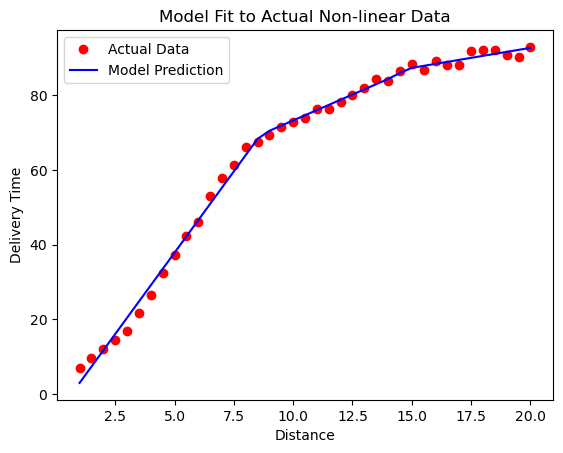

In [12]:
model.eval()  # Sets the model to evaluation mode

with torch.no_grad():  # Disables gradient calculation for inference
    predicted_times_normalized = model(distances_normalized)  # Get the model's predictions on the normalized distances 
    
predicted_times = predicted_times_normalized * times_std + times_mean  # Denormalize the predictions

plt.plot(distances.numpy(), times.numpy(), 'ro', label='Actual Data')           # Actual data points in red
plt.plot(distances.numpy(), predicted_times.numpy(), 'b-', label='Model Prediction')  # Model's predicted curve in blue
plt.xlabel('Distance')
plt.ylabel('Delivery Time')
plt.title('Model Fit to Actual Non-linear Data')
plt.legend()
plt.show()

The above plot shows that the new simple neural network model with RelU activation has successfully learned the complex non-linear relationship of the data.

**Making a Prediction**

Let's now use the newly trained model to predict the approximate the delivery time for a order distance. But as the model was trained on the normalized data, the input data must be first be normalized and then to be fed into the model for prediction and the predicted value needs once again be de-normalized back.

* First, you will take the new input distance and **normalize** it using the same mean and standard deviation from your training data. This step is CRITICAL: your model has no idea about the original scales (miles and minutes). It only understands the normalized scale it was trained on.
* After the model provides its prediction, you must **de-normalize** the output. This converts the prediction from its normalized scale back into an understandable value in minutes.
* Finally, the code uses this actual predicted time to run the decision logic. For this prediction, assume your company now promises deliveries within 45 minutes (instead of 30 minutes from Lab 1) and wants to know which vehicle to use.

In [13]:
distance_to_predict = 5.1

In [14]:
with torch.no_grad():   # Switches gradient mode off for efficient inference
    
    # Normalizes the input distance
    new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    new_distance_normalized = (new_distance - distances_mean) / distances_std
    
    # Gets the normalized prediction from the model
    predicted_time_normalized = model(new_distance_normalized)
    
    # De-normalizes the output to get the actual time in minutes
    predicted_time_actual = (predicted_time_normalized * times_std) + times_mean
    
    print(f"Predicted time for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")

Predicted time for a 5.1-mile delivery: 38.7 minutes


## Observations

- The new model consists of a network of multiple neurons.

- Adding a non-linear activation function like ReLU gave the model the ability to learn the complex, curved patterns that are common in real-world data.

- Normalization technique was used to make the training process more stable and effective.

With these fundamental skills of building architectures, preparing data, and training models, you are well prepared for the next step. In the upcoming module, you will build on this foundation to tackle new kinds of problems, like classification, and dive even deeper into the mechanics of how neural networks learn.